In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c customer-churn-prediction-2020

  0% 0.00/154k [00:00<?, ?B/s]
100% 154k/154k [00:00<00:00, 55.8MB/s]


In [5]:
from zipfile import ZipFile
file_name = '/content/customer-churn-prediction-2020.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('file extracted')

file extracted


In [6]:
!ls

customer-churn-prediction-2020.zip  sample_data		  test.csv
kaggle.json			    sampleSubmission.csv  train.csv


In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [10]:
train_df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [11]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [12]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [13]:
test_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,False,False,False,False,False,True,False,False,True,0
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,False,False,False,False,False,False,True,True,False,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,...,False,False,False,False,False,True,False,False,False,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,...,True,False,False,False,False,False,True,False,False,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,...,False,False,False,False,False,True,False,False,False,0


In [14]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['churn_yes'], axis=1)
Y = train_df['churn_yes']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [16]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(3400, 69) (850, 69) (850,) (3400,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [19]:
model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, Y_train_res = smote.fit_resample(X_train_std, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [21]:
class_weights = {0: 1, 1: 10}
history = model.fit(X_train_res, Y_train_res, validation_split=0.2, epochs = 100)

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6078 - loss: 0.6889 - val_accuracy: 0.5632 - val_loss: 0.7108
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7330 - loss: 0.5282 - val_accuracy: 0.7756 - val_loss: 0.5391
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7667 - loss: 0.4741 - val_accuracy: 0.7893 - val_loss: 0.5242
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7955 - loss: 0.4376 - val_accuracy: 0.8289 - val_loss: 0.4656
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8188 - loss: 0.4150 - val_accuracy: 0.8573 - val_loss: 0.4194
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8347 - loss: 0.3773 - val_accuracy: 0.8530 - val_loss: 0.4066
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8520 - loss: 0.3465 - val_accuracy: 0.8702 - val_loss: 0.3702
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8685 - loss: 0.3224 - val_ac

In [22]:
loss, accuracy  = model.evaluate(X_test_std, Y_test)
print(loss)
print(accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.6630 
0.5858700275421143
0.8823529481887817


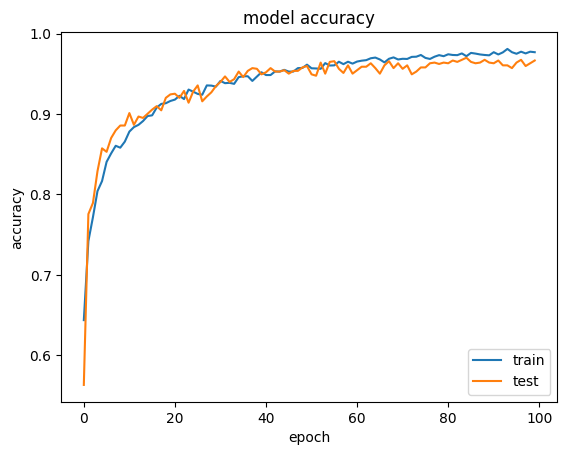

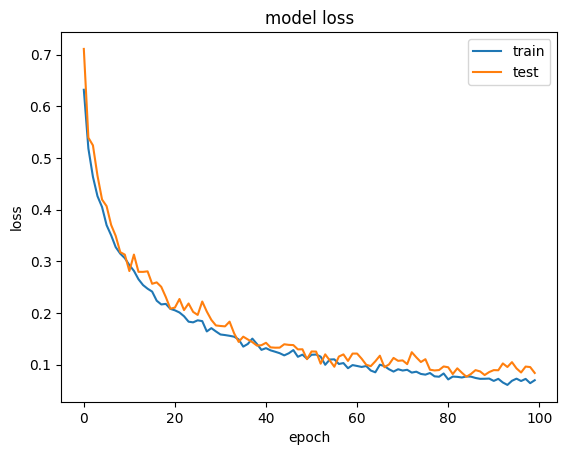

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
classification report:               precision    recall  f1-score   support

       False       0.93      0.94      0.93       745
        True       0.52      0.50      0.51       105

    accuracy                           0.88       850
   macro avg       0.73      0.72      0.72       850
weighted avg       0.88      0.88      0.88       850



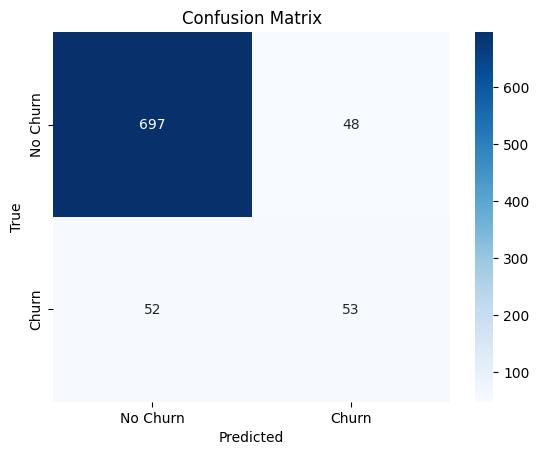

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_std)
# Convert predictions to binary format by selecting the class with the highest probability
Y_predict = y_pred.argmax(axis=1)

print(f"classification report: {classification_report(Y_test, Y_predict)}")

cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import joblib

# Save the model
joblib.dump(model, 'churn_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
rf = RandomForestClassifier()
rf.fit(X_train_std, Y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
print(feature_importance.sort_values(by='Importance', ascending=False))


                          Feature  Importance
2               total_day_minutes    0.141837
4                total_day_charge    0.133601
14  number_customer_service_calls    0.109052
67         international_plan_yes    0.062433
7                total_eve_charge    0.055418
..                            ...         ...
22                       state_DE    0.000921
15                       state_AL    0.000906
24                       state_GA    0.000880
23                       state_FL    0.000717
25                       state_HI    0.000558

[69 rows x 2 columns]


In [35]:
print(Y_predict.shape)

(850,)


In [36]:
print(Y_predict[0:10])

[0 0 0 0 0 0 0 1 0 0]
